<a href="https://colab.research.google.com/github/Krzesimir13/Data-Science/blob/main/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'2.0.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [55]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [56]:
google_raw = fetch_financial_data('GOOG')
google = google_raw.copy()
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-24,257.30,262.51,256.10,260.51,18405966
2025-10-23,253.70,255.86,252.77,253.73,13241319
2025-10-22,255.01,257.18,250.45,252.53,19650244
2025-10-21,255.25,255.38,244.67,251.34,27836425
2025-10-20,255.23,257.88,254.60,257.02,13726831
...,...,...,...,...,...
2020-11-02,81.41,83.04,80.80,81.30,50708920
2020-10-30,83.61,84.35,80.22,81.05,86617240
2020-10-29,76.12,79.69,76.11,78.36,40061280


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [57]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-10-24 to 2020-10-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [58]:
google.describe()

,Open,High,Low,Close,Volume
count,1255.00,1255.00,1255.00,1255.00,1255.00
mean,139.56,141.18,138.10,139.67,24859910.38
std,35.83,36.15,35.51,35.88,10741596.53
min,76.12,78.07,75.73,75.83,6809823.00
25%,112.79,113.95,111.24,112.63,17834743.00
50%,136.43,137.85,135.10,136.54,22449083.00
75%,164.64,166.57,163.11,164.51,28705446.50
max,257.30,262.51,256.10,260.51,97798573.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [59]:
pd.set_option('display.precision', 2)

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [60]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1255.00,1255.00,1255.00,1255.00,1255.00
mean,139.56,141.18,138.10,139.67,24859910.38
std,35.83,36.15,35.51,35.88,10741596.53
min,76.12,78.07,75.73,75.83,6809823.00
25%,112.79,113.95,111.24,112.63,17834743.00
50%,136.43,137.85,135.10,136.54,22449083.00
75%,164.64,166.57,163.11,164.51,28705446.50
max,257.30,262.51,256.10,260.51,97798573.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date', ylabel='Close'>

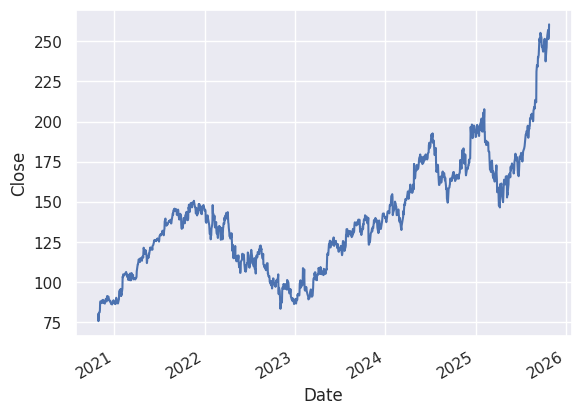

In [61]:
google['Close'].plot(ylabel='Close')

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [62]:
google.reset_index(inplace=True)
google.head()

,Date,Open,High,Low,Close,Volume
0,2025-10-24,257.30,262.51,256.10,260.51,18405966
1,2025-10-23,253.70,255.86,252.77,253.73,13241319
2,2025-10-22,255.01,257.18,250.45,252.53,19650244
3,2025-10-21,255.25,255.38,244.67,251.34,27836425
4,2025-10-20,255.23,257.88,254.60,257.02,13726831


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [63]:
google['Month'] = google.Date.dt.month
google['Year'] = google.Date.dt.year
google.Month.value_counts()

,count
Month,
8,111
3,110
10,109
5,106
12,106
7,105
9,103
6,103
4,103


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [64]:
close_year = google.groupby(google.Date.dt.year).Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Date', ylabel='Close Mean'>

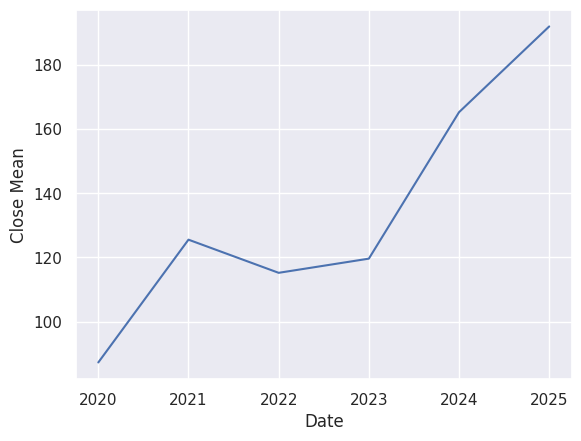

In [65]:
close_year.plot(ylabel='Close Mean')

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [66]:
close_month = google.groupby(google.Date.dt.month).Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Date', ylabel='Close Mean'>

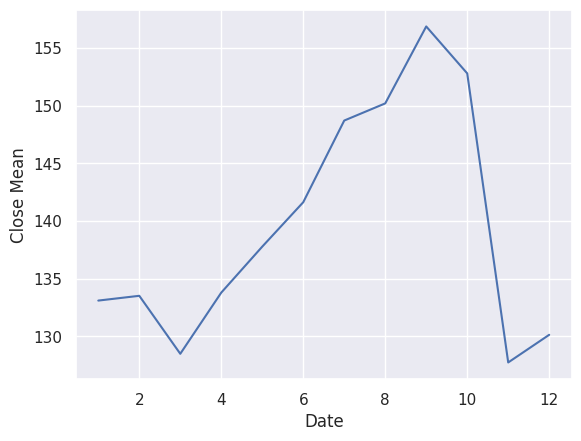

In [67]:
close_month.plot(ylabel='Close Mean')

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [68]:
year_groupby = google.groupby(google.Date.dt.year)
year_mean = year_groupby.mean()
month_groupby = google.groupby(google.Date.dt.month)
month_mean = month_groupby.mean()
print(year_mean)
print(50*'-')
print(month_mean)

                              Date   Open   High    Low  Close      Volume  \
Date                                                                         
2020 2020-11-27 23:28:41.739130368  87.21  88.20  86.39  87.25 33002211.74   
2021 2021-07-03 16:28:34.285714176 125.41 126.57 124.37 125.53 25286816.11   
2022 2022-07-02 15:23:39.920318720 115.30 116.91 113.66 115.19 28625718.04   
2023 2023-07-02 09:18:43.200000000 119.36 120.84 118.24 119.61 25565566.78   
2024 2024-07-01 19:37:08.571428608 165.20 166.92 163.64 165.28 19706891.35   
2025 2025-05-31 10:07:03.529411840 191.78 194.18 189.57 192.02 23363846.01   

      Month    Year  
Date                 
2020  11.39 2020.00  
2021   6.58 2021.00  
2022   6.55 2022.00  
2023   6.54 2023.00  
2024   6.53 2024.00  
2025   5.50 2025.00  
--------------------------------------------------
                              Date   Open   High    Low  Close      Volume  \
Date                                                                  

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [69]:
google['Close'].idxmax()

0

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [70]:
google.iloc[0].Date

Timestamp('2025-10-24 00:00:00')

### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [71]:
google
google.loc[:, ['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2025-10-24,257.30,260.51,18405966
1,2025-10-23,253.70,253.73,13241319
2,2025-10-22,255.01,252.53,19650244
3,2025-10-21,255.25,251.34,27836425
4,2025-10-20,255.23,257.02,13726831
...,...,...,...,...
1250,2020-11-02,81.41,81.30,50708920
1251,2020-10-30,83.61,81.05,86617240
1252,2020-10-29,76.12,78.36,40061280
1253,2020-10-28,77.99,75.83,36679180


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [72]:
google = google.set_index('Date')
google.head()

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2025-10-24,257.30,262.51,256.10,260.51,18405966,10,2025
2025-10-23,253.70,255.86,252.77,253.73,13241319,10,2025
2025-10-22,255.01,257.18,250.45,252.53,19650244,10,2025
2025-10-21,255.25,255.38,244.67,251.34,27836425,10,2025
2025-10-20,255.23,257.88,254.60,257.02,13726831,10,2025


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [73]:
google.drop(columns=['Year', 'Month'], inplace=True)
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-24,257.30,262.51,256.10,260.51,18405966
2025-10-23,253.70,255.86,252.77,253.73,13241319
2025-10-22,255.01,257.18,250.45,252.53,19650244
2025-10-21,255.25,255.38,244.67,251.34,27836425
2025-10-20,255.23,257.88,254.60,257.02,13726831


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [74]:
google = google.rename({'Open' : 'Otwarcie', 'High' : 'Najwyższy', 'Low' : 'Najniższy',
               'Close' : 'Zamknięcie', 'Volume' : 'Wolumen'},
              axis=1)
google = google.rename_axis('Data')

google.head()

,Otwarcie,Najwyższy,Najniższy,Zamknięcie,Wolumen
Data,,,,,
2025-10-24,257.30,262.51,256.10,260.51,18405966
2025-10-23,253.70,255.86,252.77,253.73,13241319
2025-10-22,255.01,257.18,250.45,252.53,19650244
2025-10-21,255.25,255.38,244.67,251.34,27836425
2025-10-20,255.23,257.88,254.60,257.02,13726831
